In [6]:
import numpy as np
import tifffile
import matplotlib.pyplot as plt
from deep_iglu_denoiser.utils.normalization import rolling_window_z_norm
from scipy.stats import norm

In [2]:
import h5py
peak_db = h5py.File('/home/stephan/Desktop/iglusnfr3_database/traces.h5','r')

In [7]:
def generate_synapse(height: int, width: int, synapse_diameter: int, peak: np.ndarray) -> np.ndarray:
    canvas = np.zeros((len(peak),height,width),dtype=np.float64)
    # circular synapse
    random_pos_y = np.random.choice(height)
    random_pos_x = np.random.choice(width)
    # initialize normal distribution
    norm_dist = norm.pdf(np.arange(0, synapse_diameter+1, 0.01),0,8)
    norm_dist = [n/np.max(norm_dist) for n in norm_dist]
    print(len(norm_dist))
    for y in range(height):
        for x in range(width):
            distance = np.sqrt(pow(y-random_pos_y,2)+pow(x-random_pos_x,2))
            if distance > synapse_diameter:
                continue
            for frame in range(len(peak)):
                canvas[frame,y,x] = peak[frame]*norm_dist[int(distance*100)]
    return canvas

    

x = generate_synapse(20,20,7,np.array(peak_db.get("1")["0"]))


800


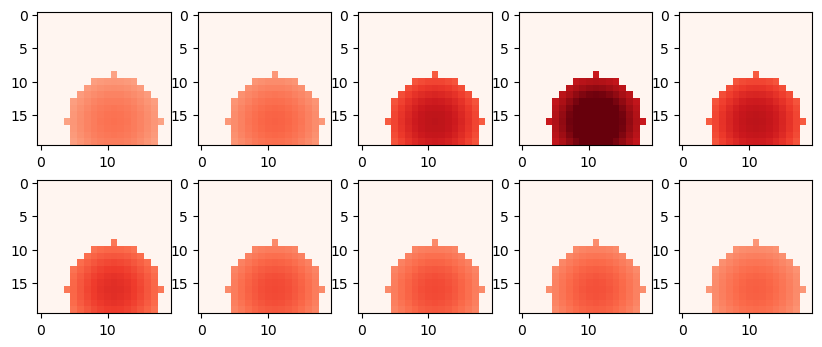

In [8]:
fig,ax = plt.subplots(2,5)
fig.set_size_inches(10,4)
for frame in range(x.shape[0]):
    col = 0 if frame < 5 else 1
    row = frame % 5
    ax[col,row].imshow(x[frame],cmap='Reds',vmin=0,vmax=2)

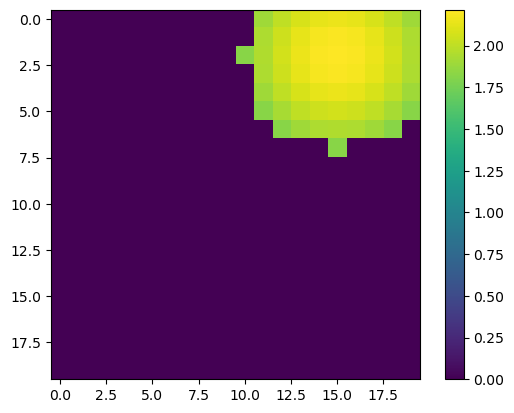

In [141]:
plt.imshow(x[3])
plt.colorbar()

In [123]:
len(np.array(peak_db.get("1")["0"]))

10

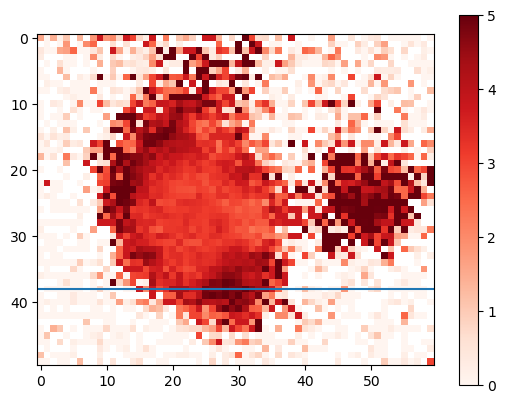

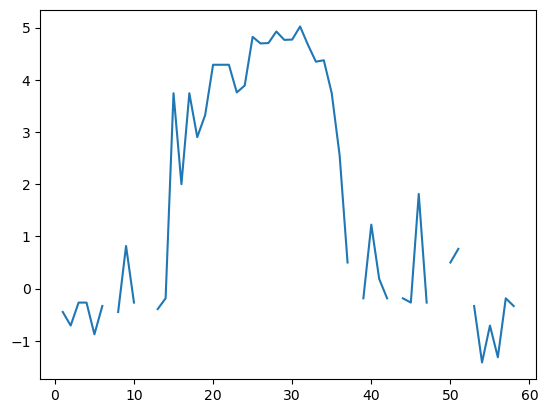

In [82]:
plt.imshow(synapse_norm[102],cmap='Reds',vmin=0,vmax=5)
plt.axhline(38)
plt.colorbar()
plt.show()
plt.plot(synapse_norm[102][38])

In [83]:
synapse_norm[102][38]

array([        nan, -0.4472136 , -0.70710678, -0.26726124, -0.26726124,
       -0.87447463, -0.33333333,         nan, -0.4472136 ,  0.81649658,
       -0.26726124,         nan,         nan, -0.39223227, -0.18569534,
        3.74165739,  2.        ,  3.74165739,  2.90128863,  3.32347026,
        4.28660705,  4.28660705,  4.28660705,  3.75692744,  3.8890873 ,
        4.8207073 ,  4.69504827,  4.70234337,  4.92346166,  4.76329974,
        4.76867291,  5.01973292,  4.66666667,  4.34599131,  4.37286533,
        3.74165739,  2.54950976,  0.5       ,         nan, -0.18569534,
        1.22474487,  0.18569534, -0.18569534,         nan, -0.18569534,
       -0.26726124,  1.81265393, -0.26726124,         nan,         nan,
        0.5       ,  0.76088591,         nan, -0.33333333, -1.41421356,
       -0.70710678, -1.31425748, -0.18569534, -0.33333333,         nan])

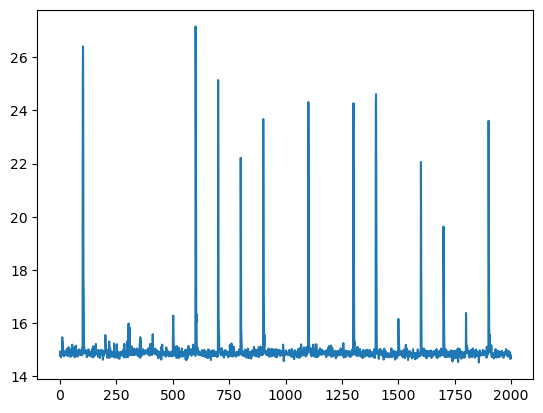

In [41]:
plt.plot(synapse.mean(axis=(1,2)))

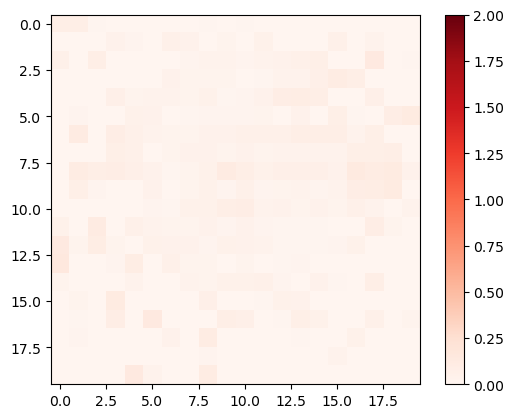

In [39]:
plt.imshow(synapse_norm[303],cmap='Reds',vmin=0,vmax=2)
plt.colorbar()

In [14]:
background = np.min(synapse,axis=0)

In [21]:
background

array([[ 7.,  8.,  7.,  9.,  8., 10., 13., 13., 13., 13., 12., 10.,  9.,
         8.,  7.,  6.,  7.,  7.,  7.,  6.],
       [ 6.,  8.,  8.,  9., 10., 13., 14., 18., 20., 21., 19., 16., 13.,
         9.,  9.,  8.,  7.,  7.,  6.,  7.],
       [ 7.,  9.,  8., 10.,  9., 13., 18., 22., 23., 24., 22., 19., 16.,
        12., 10.,  8.,  7.,  6.,  7.,  7.],
       [ 7.,  8.,  8., 11., 12., 17., 20., 24., 27., 26., 25., 24., 20.,
        14., 12.,  9.,  8.,  8.,  7.,  7.],
       [ 7.,  7.,  8., 10., 14., 18., 22., 27., 27., 27., 26., 23., 19.,
        16., 13.,  9.,  7.,  7.,  6.,  7.],
       [ 7.,  8.,  9., 12., 14., 18., 25., 34., 36., 36., 33., 27., 23.,
        16., 17., 12.,  7.,  8.,  6.,  7.],
       [ 7.,  7.,  8.,  9., 13., 19., 26., 29., 37., 39., 36., 23., 23.,
        19., 17., 13.,  9.,  7.,  6.,  7.],
       [ 7.,  8.,  9., 11., 14., 19., 24., 29., 32., 36., 34., 29., 25.,
        23., 20., 18., 11.,  8.,  7.,  8.],
       [ 7.,  7.,  8.,  9., 13., 18., 24., 27., 31., 29., 32., 2

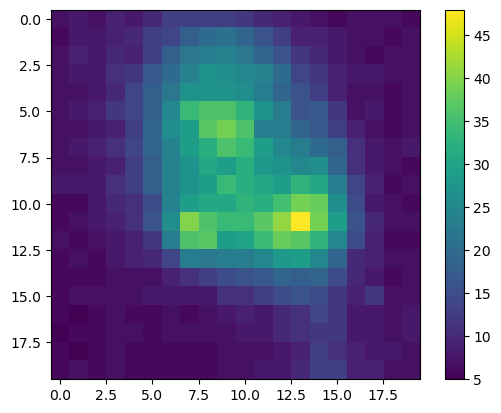

In [42]:
plt.imshow(background)
plt.colorbar()

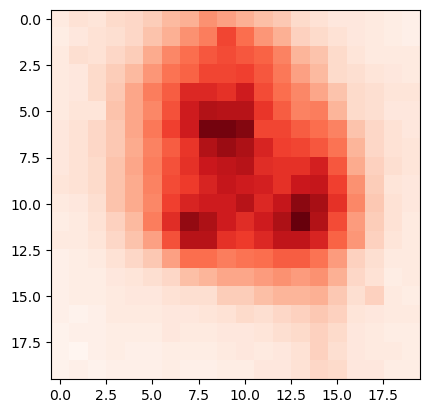

In [5]:
plt.imshow(synapse[103],cmap='Reds')

In [1]:
import numpy as np

In [3]:
t = np.random.random((100,50,50))

0
0
1


In [2]:
import h5py
f = h5py.File('/mnt/nvme2/iGlu_train_data/iglu_train_data_cropsize32_roisize4_stim_z2.5_filtered.h5')

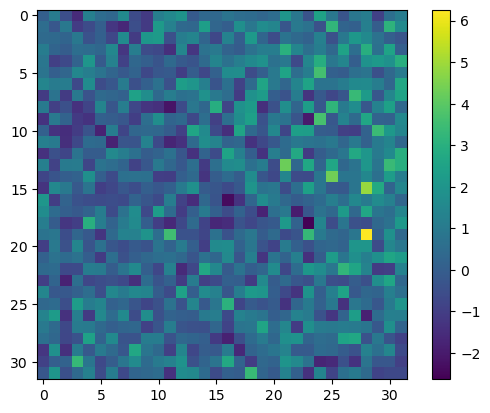

In [9]:
plt.imshow(f.get("3"))
plt.colorbar()

In [6]:
!pip install dask_image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 10.4 MB/s eta 0:00:00
  Created wheel for pims: filename=PIMS-0.6.1-py3-none-any.whl size=82619 sha256=c90f9b37a4f51376f01bf6a6f8e1001d64613d009fcca7f204a72e4d93053951
  Stored in directory: /home/stephan/.cache/pip/wheels/cc/bf/3e/bfa77232d942f8244145f9c713b6b38f6ef04b6fb5c021c114
Successfully built pims


In [15]:
x = dask.array.array([i for i in range(20)])

In [18]:
type(x)

dask.array.core.Array

In [22]:
import tifffile
import dask_image.imread
import dask.array as da
import numpy as np

filepath="/home/stephan/Desktop/glu_test_data/raw/Glu-1Hz-Stim_20s_1_R2.tif"

x = dask_image.imread.imread(filepath)


In [12]:
x = x.astype(np.float64)

In [31]:
da.append(da.array([]),1)

dask.array<astype, shape=(1,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>

In [57]:
from dask_image.ndfilters import uniform_filter
import dask
from tqdm import tqdm

def transform_frame(
    list_param: list
) -> list[float]:
    frame, cropsize, h_activitymap, w_activitymap,roi_size = list_param
    activity_map_frame = []
    mean_frame = uniform_filter(frame, roi_size, mode="constant")
    for y in range(h_activitymap):
        start_y = y * cropsize
        stop_y = (y + 1) * cropsize
        row = []
        for x in range(w_activitymap):
            start_x = x * cropsize
            stop_x = (x + 1) * cropsize

            row.append(da.max(mean_frame[start_y:stop_y, start_x:stop_x]))
        activity_map_frame.append(row)
    return activity_map_frame


def compute_activitymap(img: np.ndarray, cropsize: int, roi_size: int):
    """
    Compute the activity map for a sequence of image frames by applying the
    transform_frame function.

    Parameters:
    - img (np.ndarray): Input image sequence as a 3D NumPy array.
    - cropsize: Size of the kernel used for patch extraction (image size on that is trained).
    - roi_size: Size of the sliding window (Region of Interest).

    Returns:
    - np.ndarray: Activity map for the input image sequence.
    """
    h_activitymap = img.shape[1] // cropsize
    w_activitymap = img.shape[2] // cropsize
    activitymap = []
    blocks = img.to_delayed().ravel()
    results = [da.from_delayed(transform_frame([frame,cropsize,h_activitymap,w_activitymap,roi_size]),shape=(2000,), dtype=np.float64) for frame in blocks]
    activitymap = da.concatenate(results, axis=1, allow_unknown_chunksizes=True)
    arr.compute()
    print('activitymap')
    return activitymap


def get_frames_position(
    img: np.ndarray,
    min_z_score: float,
    cropsize: int = 32,
    roi_size: int = 4,
) -> list[list[int]]:
    """
    Identify positions of frames based on the computed activity map and a minimum Z-score threshold.

    Parameters:
    - img (np.ndarray): Input image sequence as a 3D NumPy array.
    - min_z_score (float): Minimum Z-score threshold for identifying frames.
    - cropsize (int): Size of the kernel used for patch extraction.
    - roi_size (int): Size of the sliding window (Region of Interest).
    - foreground_background_split (float): Split ratio between foreground and background.

    Returns:
    - list[list[int]]: List of frame positions, each represented as [frame_index, y_position, x_position].
    """
    frames_w_pos = []
    activitymap = compute_activitymap(img, cropsize, roi_size)
    above_z = da.argwhere(activitymap > min_z_score)
    for example in above_z:
        frame, y, x = example
        frames_w_pos.append([int(frame), int(y * cropsize), int(x * cropsize)])
    print('Frmaes')
    return frames_w_pos


In [58]:
import time
start = time.time()
mean = x.mean(axis=0)
std = x.std(axis=0)
normalized_file = da.divide(da.subtract(x,mean),std)
print('HERE')
# will go through all frames and extract events that within a meaned kernel exceed the
# min_z_score threshold
# returns a list of events in the form [frame, y-coord, x-coord]
frames_and_positions = get_frames_position(
    normalized_file,
    3,
    32,
    6
)

print(f'Execution took {np.round(time.time()-start,3)}s.')

HERE


TypeError: The ndim must be of integral type.

In [19]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from deep_iglu_denoiser.utils.activitymap import compute_activitymap

In [4]:
h5 = h5py.File("/mnt/nvme2/iGlu_train_data/iglu_train_data_cropsize32_roisize6_z3_pre5_post5.h5","r")

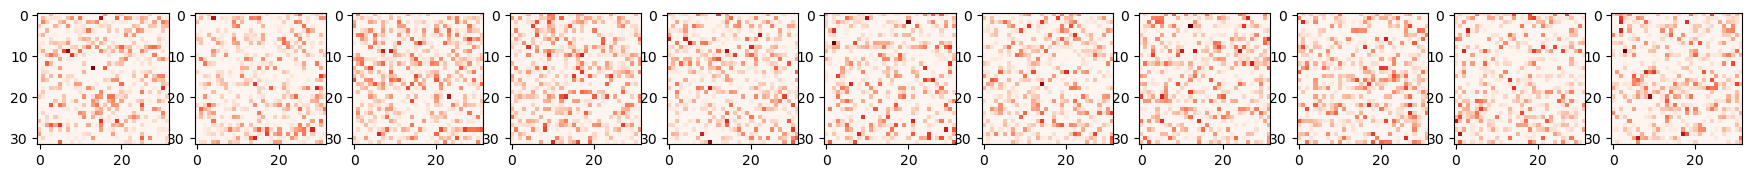

In [17]:
def plot_seq(img_seq: np.ndarray) -> None:
    fig, ax = plt.subplots(1,11)
    fig.set_size_inches(22,2)
    for i,img in enumerate(img_seq):
        ax[i].imshow(img,cmap='Reds',vmin=0,vmax=4)
    plt.show()
plot_seq(np.array(h5.get("21")))

In [20]:
compute_activitymap(np.array(h5.get("21")),32,6)

array([[[0.53547947]],

       [[0.36561775]],

       [[0.56382365]],

       [[0.67145389]],

       [[0.44499071]],

       [[0.3364878 ]],

       [[0.43599292]],

       [[0.54569149]],

       [[0.73584739]],

       [[0.74985391]],

       [[0.58948433]]])

In [5]:
h5.get("0")

<HDF5 dataset "0": shape (11, 32, 32), type "<f8">